# 分類問題における評価方法

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = 1 - data.target
# ラベルの0と1を反転

X = X[:, :10]
from sklearn.linear_model import LogisticRegression
model_lor = LogisticRegression()
model_lor.fit(X, y)
y_pred = model_lor.predict(X)

## 混同行列

In [2]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
print(cm)

[[341  16]
 [ 36 176]]


## 正解率

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9086115992970123

## 適合率

In [4]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.9166666666666666

## 再現率

In [5]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8301886792452831

## F値

In [6]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8712871287128713

## 予測確率

In [7]:
model_lor.predict_proba(X)

array([[4.41813063e-03, 9.95581869e-01],
       [4.87318124e-04, 9.99512682e-01],
       [3.31064283e-04, 9.99668936e-01],
       ...,
       [2.62819355e-02, 9.73718064e-01],
       [5.09374722e-06, 9.99994906e-01],
       [9.74068776e-01, 2.59312244e-02]])

In [8]:
import numpy as np
y_pred2 = (model_lor.predict_proba(X)[:, 1]>0.1).astype(np.int)
print(confusion_matrix(y, y_pred2))

[[259  98]
 [  2 210]]


In [9]:
print(accuracy_score(y, y_pred2))
print(recall_score(y, y_pred2))

0.8242530755711776
0.9905660377358491


## ROC曲線・AUC

In [10]:
from sklearn.metrics import roc_curve
probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

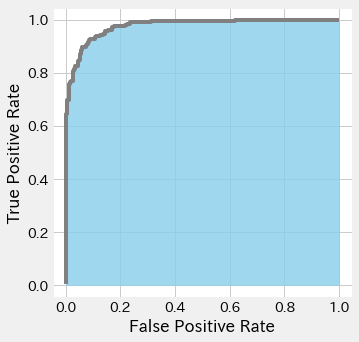

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)

ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, probas[:, 1])

0.9767322023148881

# 回帰問題における評価方法

In [13]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data[:, [5,]]
y = data.target

In [15]:
from sklearn.linear_model import LinearRegression
model_lir = LinearRegression()
model_lir.fit(X, y)
y_pred = model_lir.predict(X)

In [16]:
print(model_lir.coef_)
print(model_lir.intercept_)

[9.10210898]
-34.67062077643857


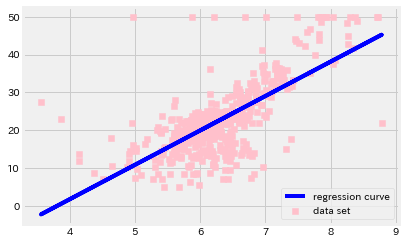

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X, y, color='pink', marker='s', label='data set')
ax.plot(X, y_pred, color='blue', label='regression curve')
ax.legend()
plt.show()

## 平均二乗誤差

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

43.60055177116956

## 決定係数

In [19]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.48352545599133423

# 異なるアルゴリズムを利用した場合との比較

In [20]:
from sklearn.svm import SVR
model_svr_linear = SVR(C=0.01, kernel='linear')
model_svr_linear.fit(X, y)
y_svr_pred = model_svr_linear.predict(X)

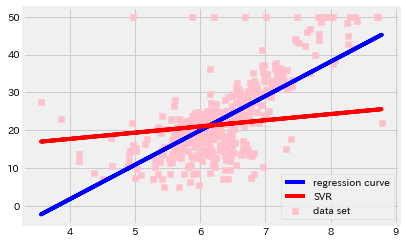

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X, y, color='pink', marker='s', label='data set')
ax.plot(X, y_pred, color='blue', label='regression curve')
ax.plot(X, y_svr_pred, color='red', label='SVR')
ax.legend()
plt.show()

In [22]:
print(mean_squared_error(y, y_svr_pred)) # 平均二乗誤差 
print(r2_score(y, y_svr_pred)) # 決定係数 
print(model_svr_linear.coef_) # 傾き 
print(model_svr_linear.intercept_) # 切片

72.14197118147209
0.14543531775956597
[[1.64398]]
[11.13520958]


# ハイパーパラメータの設定

In [23]:
model_svr_rbf = SVR(C=1.0, kernel='rbf')
model_svr_rbf.fit(X, y)
y_svr_pred = model_svr_rbf.predict(X) 
print(mean_squared_error(y, y_svr_pred)) # 平均二乗誤差 
print(r2_score(y, y_svr_pred)) # 決定係数

36.42126375260171
0.5685684051071418


In [24]:
train_X, test_X = X[:400], X[400:]
train_y, test_y = y[:400], y[400:]
model_svr_rbf_1 = SVR(C=1.0, kernel='rbf')
model_svr_rbf_1.fit(train_X, train_y)
test_y_pred = model_svr_rbf_1.predict(test_X) 
print(mean_squared_error(test_y, test_y_pred)) # 平均二乗誤差 
print(r2_score(test_y, test_y_pred)) # 決定係数

69.16928620453004
-1.4478345530124388


# 学習データと検証データに分割

In [25]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_train_pred = model_svc.predict(X_train)
y_test_pred = model_svc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

1.0
0.6491228070175439


In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_train_pred = model_rfc.predict(X_train)
y_test_pred = model_rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9974874371859297
0.9590643274853801


# 交差検証（クロスバリデーション）

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True)
model_rfc_1 = RandomForestClassifier()
cross_val_score(model_rfc_1, X, y, cv=cv, scoring='accuracy')

array([0.9122807 , 0.96491228, 0.90350877, 0.96491228, 0.96460177])

In [29]:
cross_val_score(model_rfc_1, X, y, cv=cv, scoring="f1")

array([0.95522388, 0.95652174, 0.95945946, 0.96644295, 0.99310345])

# ハイパーパラメータの探索

In [30]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = 1 - data.target # ラベルの0と1を反転
X = X[:, :10]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True)
param_grid = {'max_depth': [5, 10, 15], 'n_estimators': [10, 20, 30]}
model_rfc_2 = RandomForestClassifier()
grid_search = GridSearchCV(model_rfc_2, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15], 'n_estimators': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9384885764499121
{'max_depth': 5, 'n_estimators': 20}


In [33]:
grid_search = GridSearchCV(model_rfc_2, param_grid, cv=cv, scoring='f1')